# TASK: 1 - Supervised Machine Learning
#####  There are two types of supervised machine learning algorithms: Regression and classification. In this task we have applied linear regression on data to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

#### Import all the required libraries :

In [82]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [83]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Let's explore the data!

In [84]:
df.shape

(25, 2)

In [85]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. 

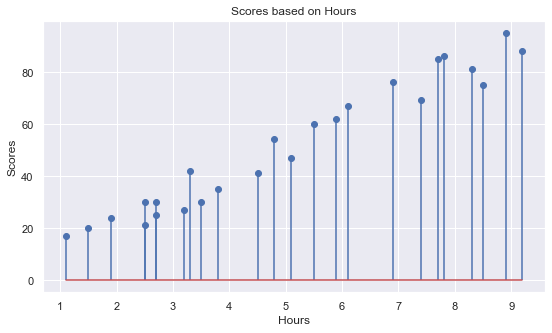

In [86]:
sns.set(style="darkgrid")
plt.figure(figsize=(9,5))
plt.stem(df.Hours, df.Scores,use_line_collection=True)

plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores based on Hours')

plt.show()

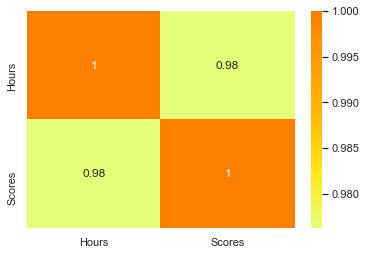

In [87]:
# correlation plot
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

#### We can see that there is a strong correlation between Hours and Scores.

## Splitting the Data

#### Our next step is to divide the data into “attributes” and “labels”. Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our data, we only have two columns. We want to predict the Scores depending upon the number of hours recorded.

In [88]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

# Training the Algorithm

#### Next, we split 80% of the data to the training set while 20% of the data to test set using below code. The test_size variable is where we actually specify the proportion of the test set.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

#### After splitting the data into training and testing sets, finally, the time is to train our algorithm. For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.

In [90]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print("Training complete.")#training the algorithm

Training complete.


In [91]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

2.018160041434683
[9.91065648]


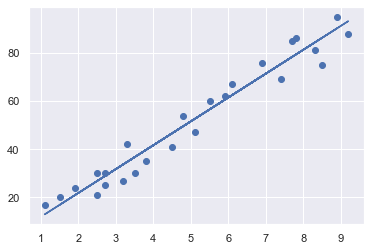

In [92]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. 

In [93]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [94]:
# Now compare the actual output values for X_test with the predicted values
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


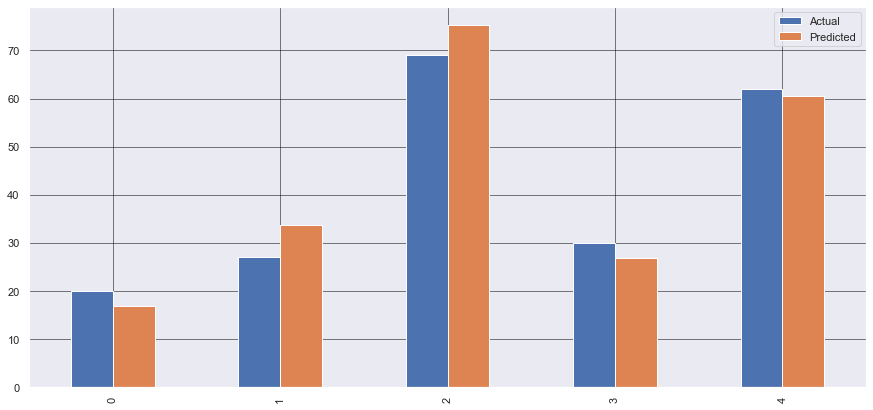

In [95]:
# We can also visualize comparison result as a bar graph
df1 = df.head()
df1.plot(kind='bar',figsize=(15,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

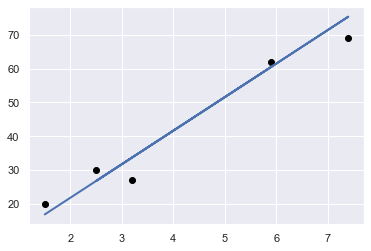

In [96]:
# Let's plot our straight line with the test data :
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='b', linewidth=2)
plt.show()

## Prediction of Score

In [97]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [98]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
